In [2]:
"""=============================================================================
    Có 60% người mua xe thể thao là nam giới.  
        1. Chọn loại phân phối. Tạo ra 10 mẫu (ngẫu nhiên) theo mô tả trên 
           với số lần lặp lại các thí nghiệm là 1000
        2. Vẽ histogram quan sát. Nhận xét.
        3. Trong 10 chủ xe thể thao được chọn ngẫu nhiên, tính xs có 7 nam giới.
============================================================================="""

#Probability of X wanted cases out of N experiments within Size trials
# X~binom(n, p, size)

print()

In [3]:
import pandas as pd
from scipy import stats
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#-------------------------------------------------------------------------------
#  Hàm tính tổ hợp n chập k
#  Vơi Python 3.8 thì dùng math.comb(n, k)
#-------------------------------------------------------------------------------
def combination(n, k):
    # n!/(k!)(n-k)!
    numerator   = math.factorial(n) #Giai thừa
    denominator = math.factorial(k) * math.factorial(n - k)

    return (numerator / denominator)

import math

In [8]:
print('=====================================================================================================================')
print('*** 1. Chọn loại phân phối. Tạo ra 10 mẫu (ngẫu nhiên) theo mô tả trên, với số lần lặp lại các thí nghiệm là 1000 ***')
print('=====================================================================================================================')

#Choose binominal distribution X~binominal(n, p, size)
n = 10 #number of observations
p = 0.6 #probability of wanted observations
size = 1000 #number of trials (repetition of experiment)

sport_10_06men_1000 = stats.binom.rvs(n=n, p=p, size=size)
print('sport_10_06men_1000 = stats.binom.rvs(n=10, p=0.6, size=1000)')

*** 1. Chọn loại phân phối. Tạo ra 10 mẫu (ngẫu nhiên) theo mô tả trên, với số lần lặp lại các thí nghiệm là 1000 ***
sport_10_06men_1000 = stats.binom.rvs(n=10, p=0.6, size=1000)


*** 2. Vẽ histogram quan sát. Nhận xét. ***


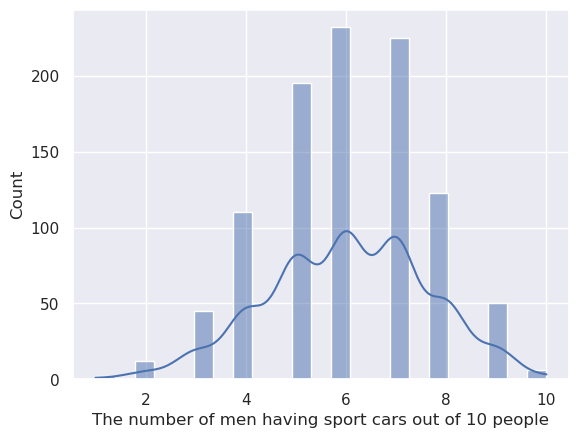


Comments:
  1: Out of 1000 trials, there are about 275 trials having 6 men / 10 people obtaining sport cars, also the largest count
  2: The distribution and the density plot resembles normal distribution


In [10]:
print('===========================================')
print('*** 2. Vẽ histogram quan sát. Nhận xét. ***')
print('===========================================')

sbn.set_theme(style='darkgrid')
sbn.histplot(sport_10_06men_1000, kde=True)
plt.xlabel('The number of men having sport cars out of 10 people')
plt.show()

print('\nComments:')
print('  1: Out of 1000 trials, there are about 275 trials having 6 men / 10 people obtaining sport cars, also the largest count')
print('  2: The distribution and the density plot resembles normal distribution')

In [12]:
print('================================================================================')
print('*** 3. Trong 10 chủ xe thể thao được chọn ngẫu nhiên, tính xs có 7 nam giới. ***')
print('================================================================================')

P_7men_1000trials = math.comb(10,7) * math.pow(p,7) * math.pow(1-p,3)

print('Probalbility of drawing 7 men having sport cars within 10 people out of 1000 trials:', P_7men_1000trials)

*** 3. Trong 10 chủ xe thể thao được chọn ngẫu nhiên, tính xs có 7 nam giới. ***
Probalbility of drawing 7 men having sport cars within 10 people out of 1000 trials: 0.21499084799999998


In [16]:
#Create dataframe: k of wanted observation, number of trials having k sucess, probability

x = np.unique(sport_10_06men_1000).tolist() #number k of wanted experiments (out of 10)

trials_x =  [np.extract(sport_10_06men_1000 == i, sport_10_06men_1000).size for i in x] #number of trials having k wanted experiment (out of 1000)

prob_trials = [i/1000 for i in trials_x] #probability of each number of trials

df_10_06men_1000 = pd.DataFrame(
    {'x_wanted_observations':x,
    'number_of_trials_having_x':trials_x,
    'probability_of_trial':prob_trials}
)

df_10_06men_1000.set_index('x_wanted_observations', inplace=True)

df_10_06men_1000

,number_of_trials_having_x,probability_of_trial
x_wanted_observations,,
1,2,0.002
2,12,0.012
3,45,0.045
4,110,0.110
5,195,0.195
6,232,0.232
7,225,0.225
8,123,0.123
9,50,0.050


In [18]:
print('Another example dataframe of X~binom(n=10, p=0.6, size=1000)')

n=10
p=0.6
size=1000

x2 = list(range(11))

x2_prob = list(math.comb(n,i) * math.pow(p,i) * math.pow(1-p, n-i) for i in x2)

x2_trials = list(i*1000 for i in x2_prob)

df = pd.DataFrame(
    {'x_wanted_observations':x2,
    'number_of_trials_having_x':x2_trials,
    'probability_of_trial':x2_prob}
)

df.set_index('x_wanted_observations', inplace=True)

df

Another example dataframe of X~binom(n=10, p=0.6, size=1000)


,number_of_trials_having_x,probability_of_trial
x_wanted_observations,,
0,0.104858,0.000105
1,1.572864,0.001573
2,10.616832,0.010617
3,42.467328,0.042467
4,111.476736,0.111477
5,200.658125,0.200658
6,250.822656,0.250823
7,214.990848,0.214991
8,120.932352,0.120932
